# 선형회귀 데모

### 라이브러리 import 및 설정

In [88]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [79]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import warnings

In [80]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

### 학습데이터 로드

In [81]:
data_dir = Path('C:\\Users\\KimSuBeen\\Desktop\\2\\오픈소스SW설계\\단국대\\DataInput\\')
trn_file = data_dir / 'train.csv'
seed = 42

In [82]:
trn = pd.read_csv(trn_file, index_col=0)
print(trn.shape)
trn.head()

(320000, 19)


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
0,23.2640,20.3368,19.0095,17.6724,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,18,18,1.1898,1.1907,1.1890,1.1894,1.1902,0
1,15.0521,14.0620,13.4524,13.2684,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,1,1,1.2533,1.2578,1.2488,1.2510,1.2555,1
2,16.7864,15.8254,15.5363,15.3935,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,2,2,1.0225,1.0241,1.0210,1.0217,1.0233,0
3,25.6606,21.1887,20.2212,19.8949,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,4,3,1.2054,1.2061,1.2049,1.2051,1.2057,0
4,24.4534,20.6992,19.0424,18.3242,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,13,12,1.1939,1.1943,1.1937,1.1938,1.1941,0


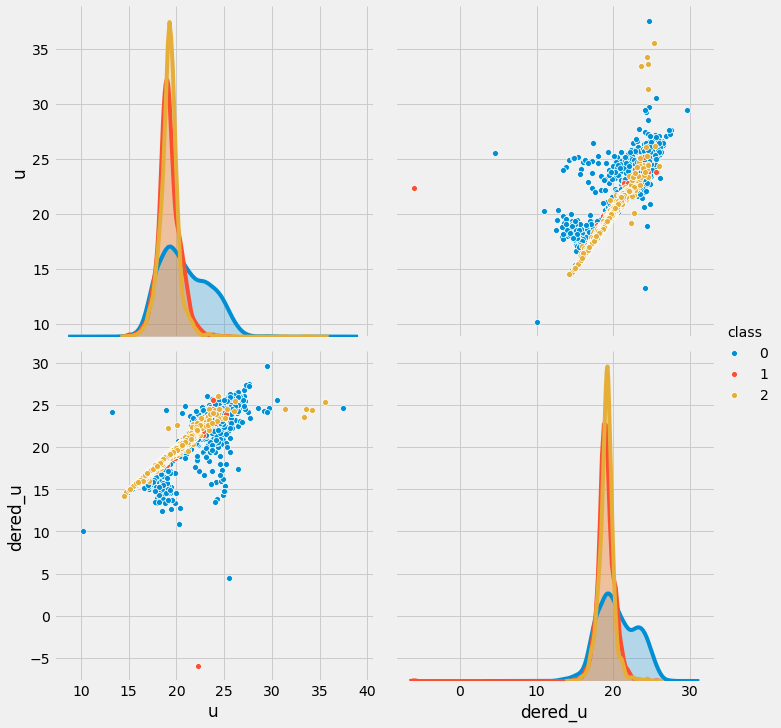

In [83]:
sns.pairplot(trn.sample(n=10000), vars=['u', 'dered_u'], hue='class', size=5)

In [84]:
X = trn[trn['class'] != 0][['u']].values
y = trn[trn['class'] != 0]['dered_u'].values
print(X.shape, y.shape)

(200004, 1) (200004,)


### RMSE 손실함수 정의¶

In [85]:
rmse = lambda y, p: np.sqrt(np.mean((y - p) ** 2))

### NumPy를 이용한 선형회귀

In [86]:
alpha = .001
theta0 = .1
theta1 = .1
epoch = 4

In [87]:
x = X.flatten()
print(x.shape)

(200004,)


In [89]:
rmses = []
for i in tqdm(range(epoch)):
    for x_i, y_i in zip(x, y):
        p_i =  theta0 + theta1 * x_i
        theta0 = theta0 + alpha * (y_i - p_i)
        theta1 = theta1 + alpha * (y_i - p_i) * x_i
    rmses.append(rmse(y, theta0 + theta1 * x))

In [90]:
theta1, theta0

(0.9362306162023849, 1.1088813148478316)

In [91]:
rmses

[0.25618215910731906,
 0.25492967552380746,
 0.25461791287963526,
 0.25454708923095914]

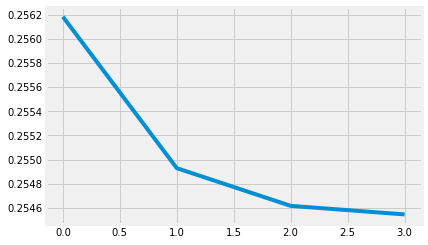

In [92]:
plt.plot(rmses)

Text(0, 0.5, 'dered_u')

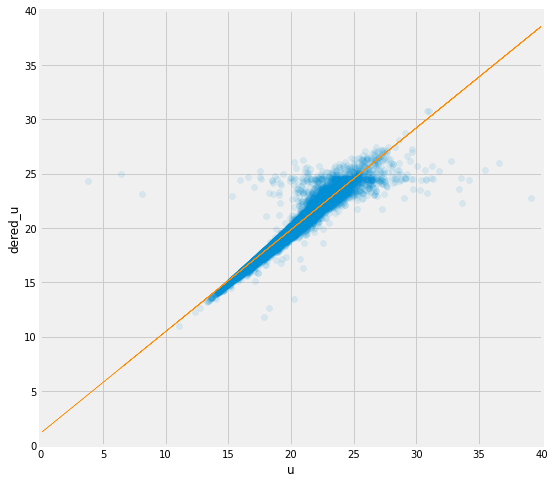

In [93]:
plt.figure(figsize=(8, 8))
plt.scatter(X, y, alpha=.1)
plt.plot(X, theta0 + theta1 * x, color='darkorange', linewidth=.5)
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.xlabel('u')
plt.ylabel('dered_u')

### scikit-learn을 이용한 선형회귀 

In [94]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)
p = lr.predict(X)

In [95]:
rmse(y, p)

0.2522450693360897

In [96]:
lr.coef_, lr.intercept_

(array([0.932043]), 1.1556424178625164)

Text(0, 0.5, 'dered_u')

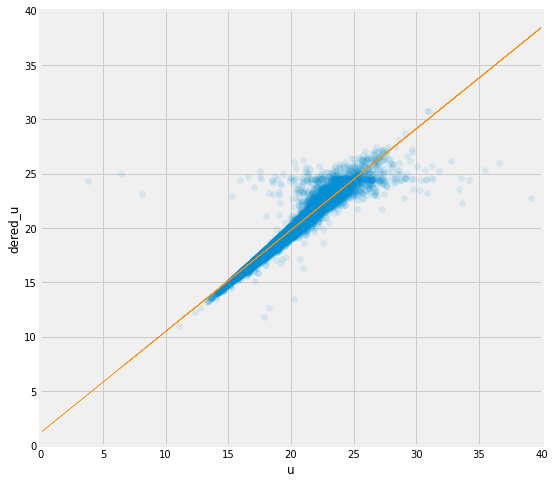

In [97]:
plt.figure(figsize=(8, 8))
plt.scatter(X, y, alpha=.1)
plt.plot(X, p, color='darkorange', linewidth=.5)
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.xlabel('u')
plt.ylabel('dered_u')

### scikit-learn을 이용한 로지스틱회귀


In [98]:
X = trn[trn['class'] != 0].drop('class', axis=1)
y = trn[trn['class'] != 0]['class'].values - 1

In [99]:
np.unique(y)

array([0, 1], dtype=int64)

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score

lr = LogisticRegression()
lr.fit(X, y)
p = lr.predict_proba(X)[:, 1]

In [101]:
lr.coef_, lr.intercept_

(array([[0.966992, 0.165050, -1.827350, 0.492278, -0.479617, -1.362388,
         2.178198, -0.055974, -1.398404, 0.410247, -0.665735, 0.034836,
         -0.051376, -0.094156, -0.096436, -0.091997, -0.093062, -0.095282]]),
 array([0.214334]))

In [102]:
log_loss(y, p)

0.36589855741992827

In [123]:
!pip install kaggle

  Created wheel for kaggle: filename=kaggle-1.5.8-py3-none-any.whl size=73279 sha256=cbcee2496d3ddb9c0721a8f4823dca7977c1324c52235c8ec067946f1a2ec4ea
  Stored in directory: c:\users\kimsubeen\appdata\local\pip\cache\wheels\f3\67\7b\a6d668747974998471d29b230e7221dd01330ac34faebe4af4
  Created wheel for python-slugify: filename=python_slugify-4.0.1-py2.py3-none-any.whl size=6774 sha256=d16df04ade23a36a7cd20e84139038fd98c1982e96100eb6f34041bb7a45a56a
  Stored in directory: c:\users\kimsubeen\appdata\local\pip\cache\wheels\91\4d\4f\e740a68c215791688c46c4d6251770a570e8dfea91af1acb5c
  Created wheel for slugify: filename=slugify-0.0.1-py3-none-any.whl size=1914 sha256=0b006f78c427b87c4339ba66ad7fe1000a88e6c055bb652bb324250f92edf82d
  Stored in directory: c:\users\kimsubeen\appdata\local\pip\cache\wheels\a2\49\ff\b5d3130b393f908f0faebf7b4069b259e97d23821826553a76
Successfully built kaggle python-slugify slugify
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.9
  

In [125]:
!pip install -U Kaggler

Requirement already up-to-date: Kaggler in c:\users\kimsubeen\anaconda3\lib\site-packages (0.8.11)


In [126]:
from kaggler.metrics import plot_roc_curve, plot_pr_curve

Text(0.5, 1.0, 'Precision-Recall Curve')

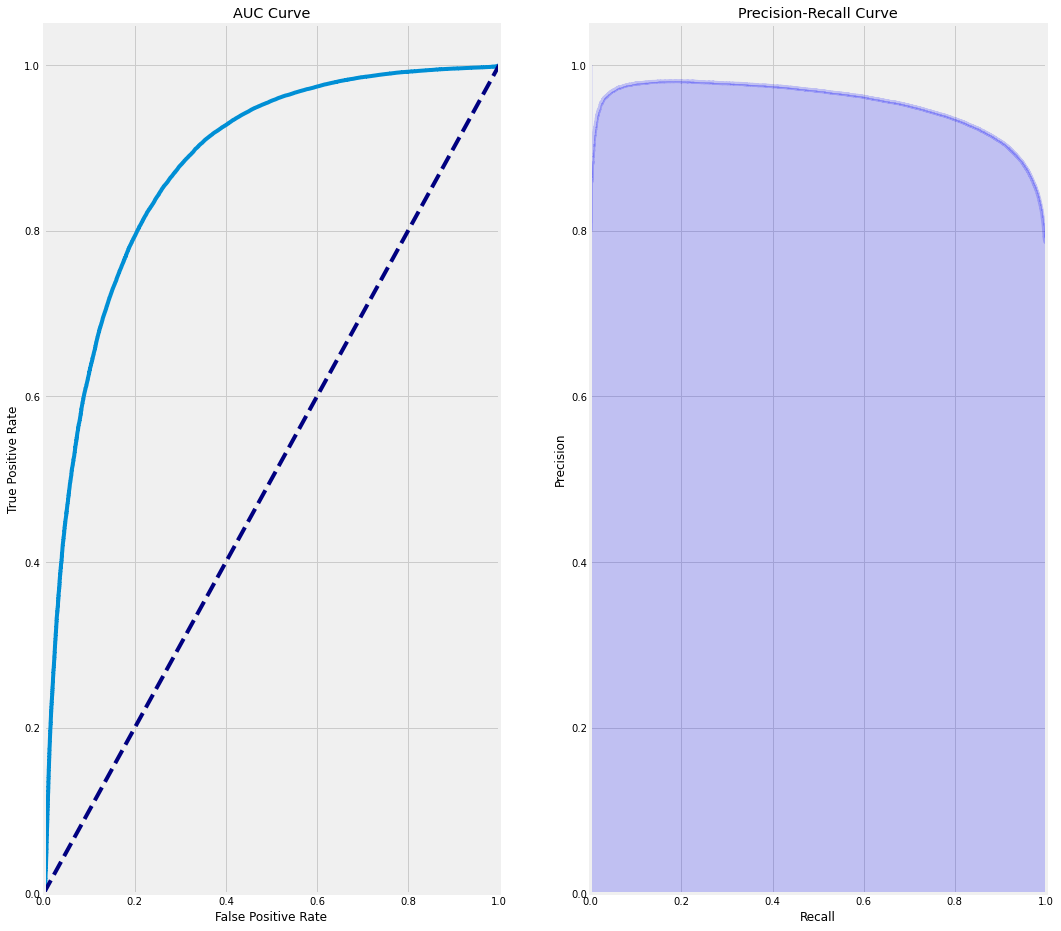

In [127]:
plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plot_roc_curve(y, p);
plt.title('AUC Curve')
plt.subplot(1, 2, 2)
plot_pr_curve(y, p);
plt.title('Precision-Recall Curve')